### Goal

We will analyse what we have done so far to identify any trends / Patterns and to answer specific question. This notebooks aims to generate visuals around the data we have compiled so far with a few time series graphs. The wildfire data is annual, so our time series will be on an annual basis. We will work on 3 specific visuals.

- A histogram showing the number of fires occurring every 50 mile distance from Madison for all fires ranging up to 1800 miles away from Madison. The histogram will indicate the 650 mile distance cut-off.

- A time series graph of total acres burned per year for the fires occurring in the 650 mile radius from Madison.

- A time series graph containing our calculated fire smoke estimates for Madison and the AQI estimates for Madison.

### Licence

The code in the notebook is licensed under standard [MIT licence](https://github.com/ManasaSRonur/data-512-project/blob/main/LICENSE).




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

We will load all the processed data for analysis.

In [2]:
all_wildfire_df = pd.read_csv('intermediary_files/all_wildfire_1964_2024.csv')
madison_wildfire_df = pd.read_csv('intermediary_files/madison_wildfire_1964_2024.csv')
aqi_df = pd.read_csv("intermediary_files/yearly_aqi_1964_2024.csv")
smoke_df = pd.read_csv('output_files/madison_yearly_smoke_estimate_1964_2024.csv')


This code, produces a histogram showing the number of fires occurring every 50 mile distance from Madison for all fires ranging up to 1800 miles away from Madison. The histogram indicates the 650 mile distance cut-off in red dotted line.

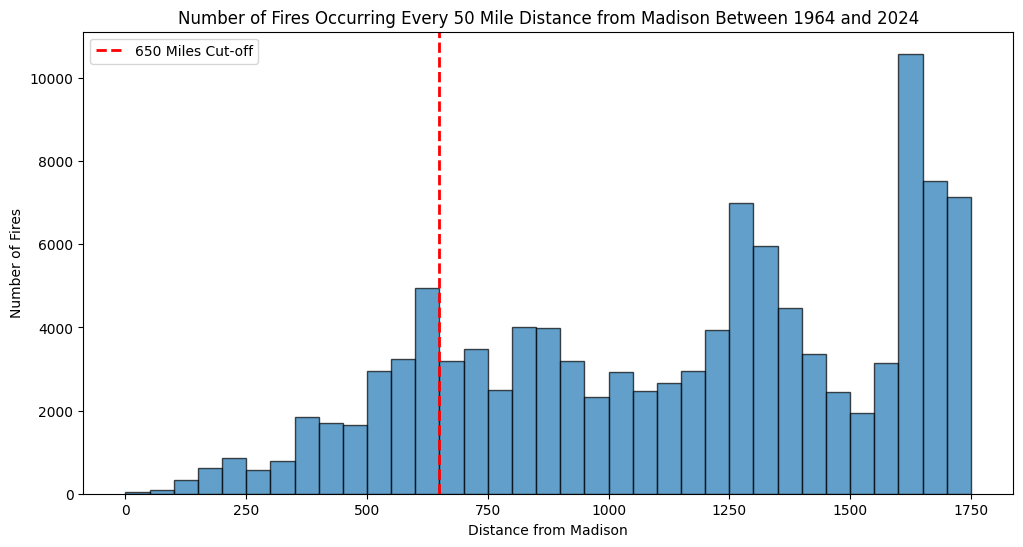

In [3]:
# Create a histogram of the 'shortest_dist' column
plt.figure(figsize=(12, 6))
plt.hist(all_wildfire_df['shortest_dist'], bins=range(0, 1800, 50), alpha=0.7, edgecolor='black')
plt.title('Number of Fires Occurring Every 50 Mile Distance from Madison Between 1964 and 2024')
plt.xlabel('Distance from Madison')
plt.ylabel('Number of Fires')
plt.axvline(x=650, color='red', linestyle='--', linewidth=2, label='650 Miles Cut-off')
plt.legend()

plt.savefig('output_files/histogram_number_of_fires.png')
plt.show()


The histogram shows that fire occurrences gradually increase with distance up to around 650 miles, followed by fluctuations in the number of fires at greater distances. Notably, there is a peak in fire occurrences between 1500 and 1750 miles from Madison. Majority of the fires fall on the other side of the cut off line. This suggests that regions farther away from Madison experienced more frequent fires during this period.

This code produces a time series graph of total acres burned per year for the fires occurring in the 650 mile radius from Madison. The total acres indcated is in the unit of millions.

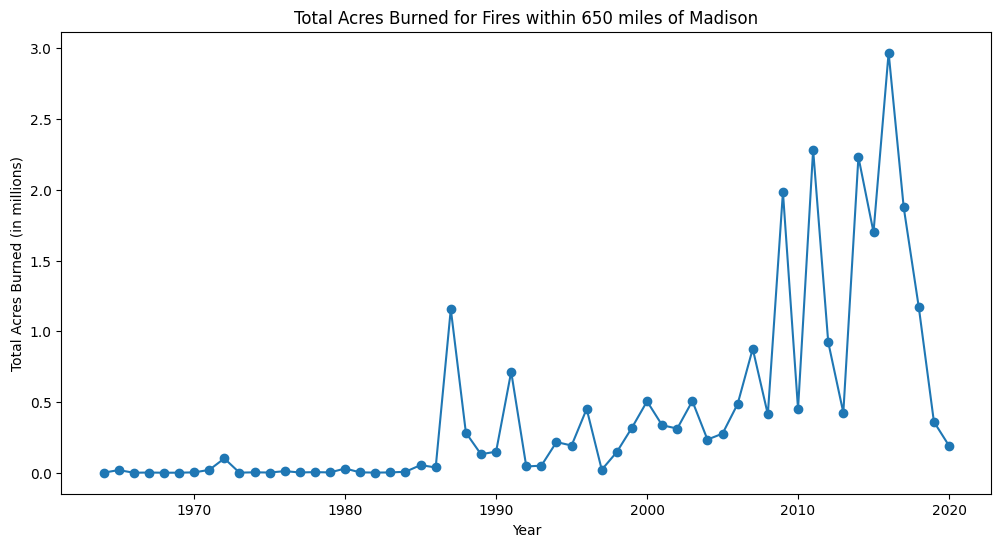

In [4]:
GIS_acres_year = madison_wildfire_df.groupby('Fire_Year')['GIS_Acres'].sum().reset_index()

# Create a time series plot of the total acres burned per year
plt.figure(figsize=(12, 6))

# Apply scaling to the y-axis
plt.plot(GIS_acres_year['Fire_Year'], GIS_acres_year['GIS_Acres']/1e6, marker='o')
plt.title('Total Acres Burned for Fires within 650 miles of Madison')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned (in millions)')
plt.savefig('output_files/Total_acres_burned.png')
plt.show()

The graph reveals a significant increase in acres burned starting around late 1980s, with peaks occurring in the early 2000s and again around 2015–2020. Before the mid-1990s, fire activity was relatively low with minimal area burned each year. Interestingly, there’s a notable drop-off in recent year, which could indicate either fewer fires or less severe fire seasons in recent years.

This code produces a time series graph containing our calculated fire smoke estimates (in blue) for Madison and the average AQI (in red) for Madison.


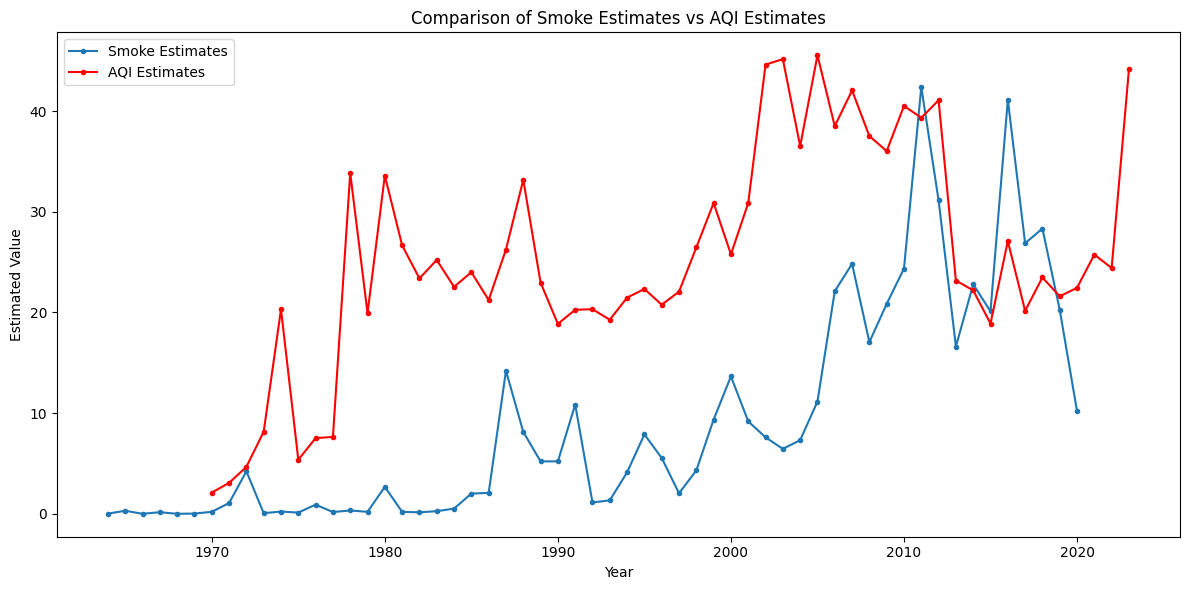

In [5]:
# Plot both average AQI and estimated smoke impact
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot estimated smoke impact on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Estimated Value')
ax1.plot(smoke_df['Fire_Year'], smoke_df['Smoke_Estimate'], label='Smoke Estimates', marker='.')
ax1.tick_params(axis='y')
ax1.plot(aqi_df['year'], aqi_df['aqi'], color='red', label='AQI Estimates', marker='.')
ax1.legend()

plt.title('Comparison of Smoke Estimates vs AQI Estimates')
plt.tight_layout()
plt.savefig('output_files/compare_smoke_vs_aqi.png')
plt.show()


The chart shows that both estimated smoke and AQI have fluctuated significantly over time. In some periods such as 1990 - 2000 and around 2010 - 2015 , there is a clear correlation between higher smoke estimates and higher AQI values, suggesting that increased smoke from fires likely contributed to poorer air quality. However, in other periods, such as around 2001 - 2006 the trends diverge, estimated smoke decreases while AQI increases sharply. This indicates that factors other than fire-related smoke may be contributing to air quality issues in these years.